<a href="https://colab.research.google.com/github/D-Satya-Harshit/ML-Projects/blob/main/Vegetables%20Quality%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
BATCH_SIZE = 16
IMAGE_SIZE = 200
CHANNELS=3
EPOCHS=50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/vegetable quality/data set/train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 7312 files belonging to 8 classes.


In [ ]:
len(dataset)

457

In [ ]:
train_size = 0.8
len(dataset)*train_size

365.6

In [ ]:
train_ds = dataset.take(365)
len(train_ds)


365

In [ ]:
val_ds = dataset.skip(365)
len(val_ds)

92

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/vegetable quality/data set/test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2376 files belonging to 8 classes.


In [ ]:
class_names = dataset.class_names
class_names

['freshcucumber',
 'freshokra',
 'freshpotato',
 'freshtomato',
 'rottencucumber',
 'rottenokra',
 'rottenpotato',
 'rottentomato']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(16, 200, 200, 3)
[7 6 3 3 1 5 7 6 3 3 7 3 5 7 4 7]


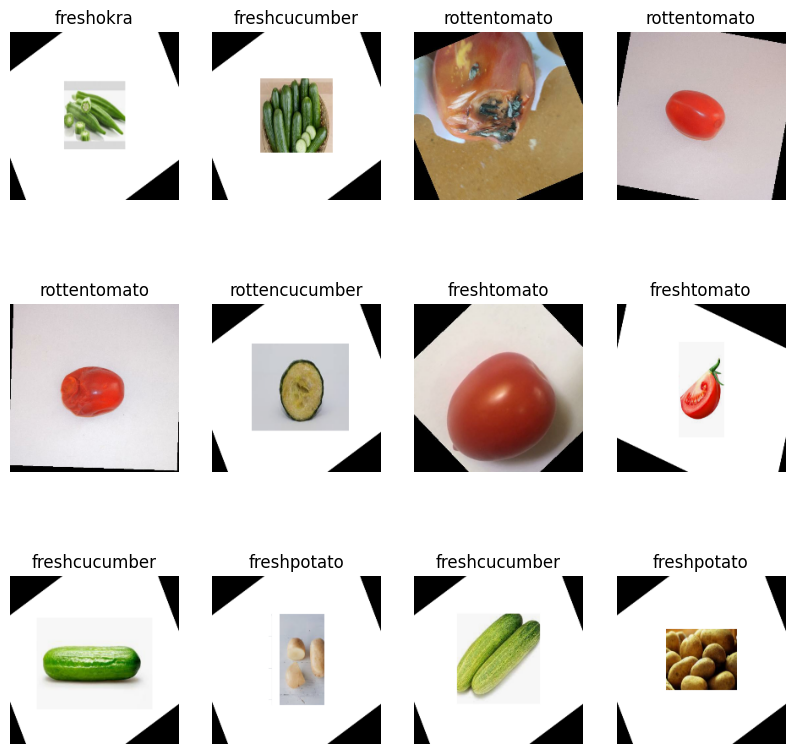

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 8

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 200, 200, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 198, 198, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (16, 99, 99, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (16, 97, 97, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (16, 48, 48, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (16, 46, 46, 128)        

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=50,validation_data=val_ds)

Epoch 1/50
365/365 [==============================] - 36s 99ms/step - loss: 0.1800 - accuracy: 0.9318 - val_loss: 0.3073 - val_accuracy: 0.9022
Epoch 2/50
365/365 [==============================] - 35s 97ms/step - loss: 0.1654 - accuracy: 0.9385 - val_loss: 0.2471 - val_accuracy: 0.9144
Epoch 3/50
365/365 [==============================] - 35s 95ms/step - loss: 0.1741 - accuracy: 0.9378 - val_loss: 0.2540 - val_accuracy: 0.9069
Epoch 4/50
365/365 [==============================] - 35s 95ms/step - loss: 0.1908 - accuracy: 0.9310 - val_loss: 0.3178 - val_accuracy: 0.8757
Epoch 5/50
365/365 [==============================] - 34s 94ms/step - loss: 0.1642 - accuracy: 0.9406 - val_loss: 0.3106 - val_accuracy: 0.8947
Epoch 6/50
365/365 [==============================] - 35s 96ms/step - loss: 0.1474 - accuracy: 0.9425 - val_loss: 0.3104 - val_accuracy: 0.8961
Epoch 7/50
365/365 [==============================] - 34s 92ms/step - loss: 0.1377 - accuracy: 0.9510 - val_loss: 0.3268 - val_accuracy:

first image to predict
actual label: rottentomato
1/1 [==============================] - 0s 22ms/step
predicted label: rottentomato


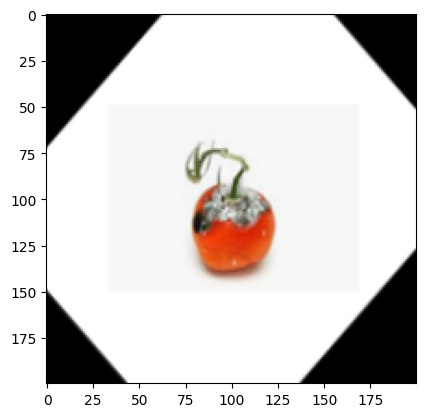

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 26ms/step


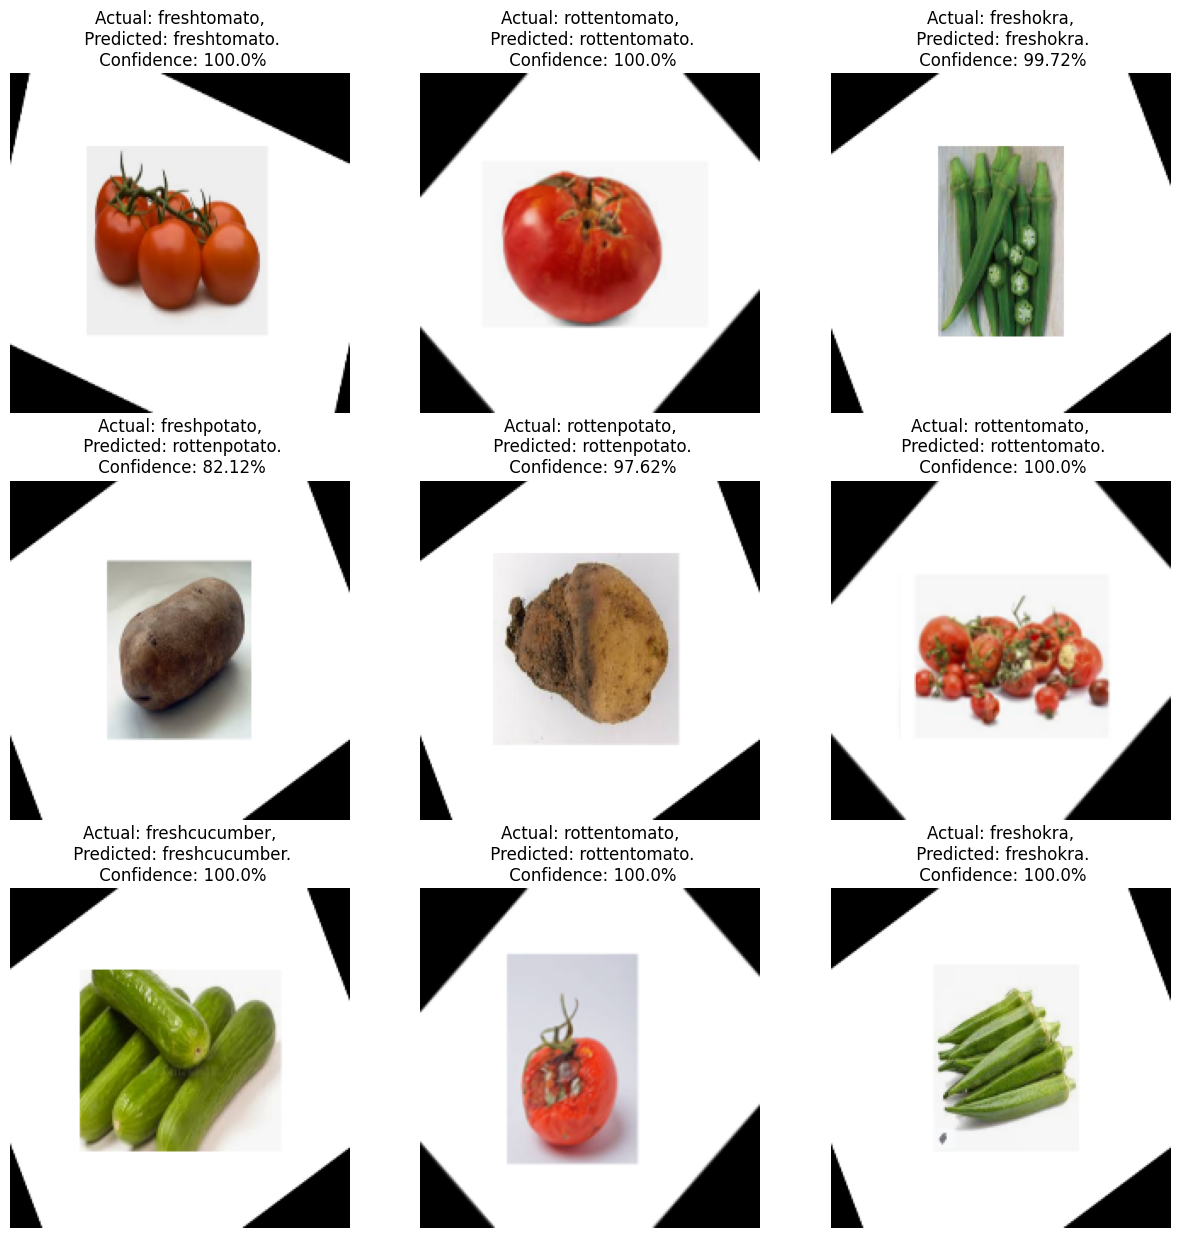

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('/content/model_saved','wb'))

In [ ]:
import cv2


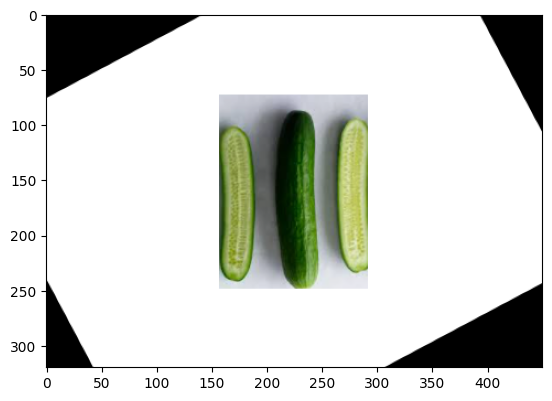

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image in BGR format
test_img = cv2.imread('/content/drive/MyDrive/vegetable quality/data set/test/freshcucumber/c_f001.png')

# Convert from BGR to RGB
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(test_img_rgb)
plt.show()


In [ ]:
test_img.shape

(320, 450, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
# Assuming you have a model and test_input

predictions = model.predict(test_input)

predicted_class = class_names[np.argmax(predictions[0])]
confidence = round(100 * (np.max(predictions[0])), 2)
print('predicted class',predicted_class)

1/1 [==============================] - 0s 137ms/step
predicted class freshcucumber


In [ ]:
print('confidence',confidence)

confidence 100.0


In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/model_modelCNN(newdata).h5')

In [ ]:
pickle.dump(model,open('/content/model_saved','wb'))

In [ ]:
model.save('moredata.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

files.download('moredata.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>